## Bootstrapping CI and Model Behaviour

In [1]:
import sys
sys.path.append('..')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from functions import dplot, stat_calc, aqi_calc, score_calc

# Use seaborn style defaults and set default figure size
sns.set_style("ticks")

In [2]:
dfmod = pd.read_csv('data/aqi_data_mod.csv')
dfobs = pd.read_csv('data/aqi_data_obs.csv')

In [3]:
dfmod.isna().sum()

date               0
hour               0
mod_PM2.5          0
mod_PM2.5_stdev    0
mod_PM10           0
mod_PM10_stdev     0
dtype: int64

In [4]:
dfobs.isna().sum()

date                0
hour                0
obs_PM2.5          33
obs_PM2.5_stdev    52
obs_PM10           33
obs_PM10_stdev     52
dtype: int64

In [5]:
dfmod['datetime'] = pd.to_datetime(dfmod.date) + pd.to_timedelta(dfmod.hour)
dfobs['datetime'] = pd.to_datetime(dfobs.date) + pd.to_timedelta(dfobs.hour)

In [6]:
dfmod = dfmod.drop(['date', 'hour'], axis=1)
dfobs = dfobs.drop(['date', 'hour'], axis=1)

In [7]:
dfmod = dfmod.set_index(dfmod.datetime)
dfobs = dfobs.set_index(dfobs.datetime)

In [8]:
# Do interpolatoin of the observed data

dfobs = dfobs.interpolate(method = 'time')

In [9]:
dfobs.isna().sum()

obs_PM2.5          0
obs_PM2.5_stdev    0
obs_PM10           0
obs_PM10_stdev     0
datetime           0
dtype: int64

In [10]:
dfmod.head()

,mod_PM2.5,mod_PM2.5_stdev,mod_PM10,mod_PM10_stdev,datetime
datetime,,,,,
2020-11-01 00:00:00,152.61,51.64,241.71,105.98,2020-11-01 00:00:00
2020-11-01 01:00:00,159.82,53.31,254.49,111.38,2020-11-01 01:00:00
2020-11-01 02:00:00,160.04,51.57,252.47,109.05,2020-11-01 02:00:00
2020-11-01 03:00:00,156.73,40.47,242.03,87.21,2020-11-01 03:00:00
2020-11-01 04:00:00,156.32,41.95,232.03,84.02,2020-11-01 04:00:00


In [11]:
dfobs.head()

,obs_PM2.5,obs_PM2.5_stdev,obs_PM10,obs_PM10_stdev,datetime
datetime,,,,,
2020-11-01 00:00:00,387.90,158.73,561.44,165.77,2020-11-01 00:00:00
2020-11-01 01:00:00,348.11,143.39,486.04,159.66,2020-11-01 01:00:00
2020-11-01 02:00:00,326.03,120.39,516.67,134.42,2020-11-01 02:00:00
2020-11-01 03:00:00,302.90,111.29,514.41,125.31,2020-11-01 03:00:00
2020-11-01 04:00:00,309.05,104.38,520.55,102.16,2020-11-01 04:00:00


In [12]:
# Extracting the different values for the months

dfmod['month'] = dfmod.index.month
dfobs['month'] = dfobs.index.month

In [13]:
splits1 = dfmod.groupby('month')
splits2 = dfobs.groupby('month')

In [14]:
dfmod_jan = list(splits1)[0][1]
dfmod_nov = list(splits1)[1][1]
dfmod_dec = list(splits1)[2][1]

dfobs_jan = list(splits2)[0][1]
dfobs_nov = list(splits2)[1][1]
dfobs_dec = list(splits2)[2][1]

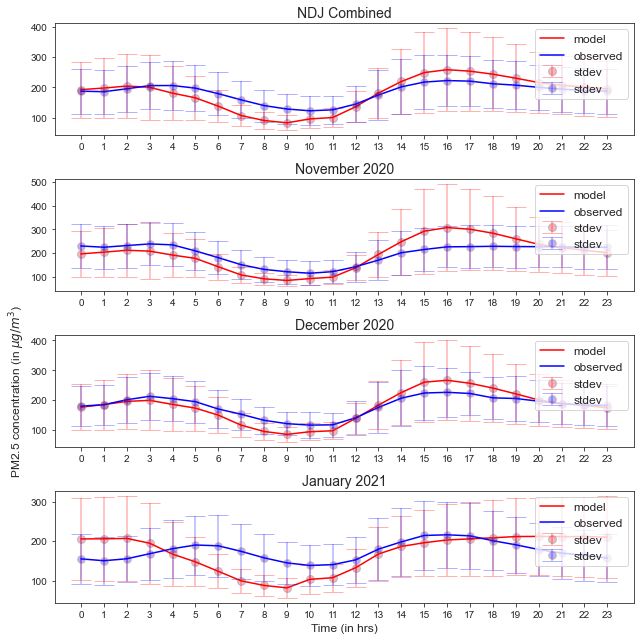

In [15]:
fig = plt.figure(figsize=(9,9))

plt.subplot(411)
dplot.plot(dfmod, dfobs, 'mod_PM2.5', 'obs_PM2.5', mod_stdev='mod_PM2.5_stdev', obs_stdev='obs_PM2.5_stdev')
# plt.ylabel('PM2.5 concentration', fontsize=12)
# plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('NDJ Combined', fontsize=14)

plt.subplot(412)
dplot.plot(dfmod_nov, dfobs_nov, 'mod_PM2.5', 'obs_PM2.5', mod_stdev='mod_PM2.5_stdev', obs_stdev='obs_PM2.5_stdev')
# plt.ylabel('PM2.5 concentration', fontsize=12)
# plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('November 2020', fontsize=14)

plt.subplot(413)
dplot.plot(dfmod_dec, dfobs_dec, 'mod_PM2.5', 'obs_PM2.5', mod_stdev='mod_PM2.5_stdev', obs_stdev='obs_PM2.5_stdev')
plt.ylabel('PM2.5 concentration (in $\mu g/m^3$)', fontsize=12)
# plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('December 2020', fontsize=14)

plt.subplot(414)
dplot.plot(dfmod_jan, dfobs_jan, 'mod_PM2.5', 'obs_PM2.5', mod_stdev='mod_PM2.5_stdev', obs_stdev='obs_PM2.5_stdev')
# plt.ylabel('PM2.5 concentration', fontsize=12)
plt.xlabel('Time (in hrs)', fontsize=12)
plt.title('January 2021', fontsize=14)

# fig.suptitle('PM2.5 concentration (in $\mu g/m^3$) over Delhi', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/diurnal_pm25.png', dpi=300)

In [16]:
dfmod.rename(columns={
    "mod_PM10_stdev ":"mod_PM10_stdev",
}, inplace=True)

dfobs.rename(columns={
    "obs_PM10_stdev ":"obs_PM10_stdev"
}, inplace=True)

In [17]:
# df = pd.concat([dfmod, dfobs], axis = 1, join = "inner")
df = aqi_calc.get_aqi(dfmod, dfobs)

In [18]:
# df.drop('datetime', axis = 1, inplace = True)

In [19]:
df.tail()

,mod_PM2.5,mod_PM10,mod_pm2,mod_pm2_stdev,mod_pm10,mod_pm10_stdev,mod_aqi_pm2,mod_aqi_pm10,quality_mod_pm25,quality_mod_pm10,obs_PM2.5,obs_PM10,obs_pm2,obs_pm2_stdev,obs_pm10,obs_pm10_stdev,obs_aqi_pm2,obs_aqi_pm10,quality_obs_pm25,quality_obs_pm10
datetime,,,,,,,,,,,,,,,,,,,,
2021-01-31 19:00:00,262.13,477.64,169.556250,94.367917,304.631250,181.144583,338.108756,254.631250,4,3,283.41,473.15,163.405000,70.887083,312.015000,130.423750,333.378445,262.015000,4,3
2021-01-31 20:00:00,280.50,515.65,171.562083,97.251250,308.490417,186.558750,339.651242,258.490417,4,3,258.25,404.22,166.218750,72.538750,314.311250,131.777500,335.542219,264.311250,4,3
2021-01-31 21:00:00,280.55,531.10,173.837083,98.862083,313.481667,190.334167,341.400717,263.481667,4,3,259.50,420.72,168.468750,73.830417,315.406250,129.229583,337.272469,265.406250,4,3
2021-01-31 22:00:00,317.31,602.42,178.011667,101.294583,322.102083,195.576667,344.610972,272.102083,4,3,279.51,433.31,171.528750,74.962083,319.125000,131.076667,339.625609,269.125000,4,3
2021-01-31 23:00:00,346.14,654.82,183.647083,105.107500,333.397917,202.817500,348.944607,283.397917,4,3,264.59,419.70,174.874583,75.262917,323.839583,131.555833,342.198555,273.839583,4,3


In [20]:
df.shape

(2185, 20)

In [21]:
# Extracting the separate values for the winter months separately
dfnov = df.loc['2020-11-01':'2020-11-30']
dfdec = df.loc['2020-12-01':'2020-12-31']
dfjan = df.loc['2021-01-01':'2021-01-31']

dfnov.head()

,mod_PM2.5,mod_PM10,mod_pm2,mod_pm2_stdev,mod_pm10,mod_pm10_stdev,mod_aqi_pm2,mod_aqi_pm10,quality_mod_pm25,quality_mod_pm10,obs_PM2.5,obs_PM10,obs_pm2,obs_pm2_stdev,obs_pm10,obs_pm10_stdev,obs_aqi_pm2,obs_aqi_pm10,quality_obs_pm25,quality_obs_pm10
datetime,,,,,,,,,,,,,,,,,,,,
2020-11-01 23:00:00,90.07,181.35,127.504583,59.183333,219.647500,118.243750,305.771025,178.967350,4,2,159.32,270.60,179.448750,66.654167,335.294375,99.067708,345.716089,285.294375,4,3
2020-11-02 00:00:00,91.95,186.83,124.977083,59.065833,217.360833,118.301250,303.827377,177.458150,4,2,139.33,244.12,169.091667,63.607917,322.072708,97.627292,337.751492,272.072708,4,3
2020-11-02 01:00:00,102.19,208.51,122.575833,59.254167,215.445000,118.876667,301.980816,176.193700,4,2,116.35,226.64,159.435000,60.396667,311.264375,95.753542,330.325515,261.264375,4,3
2020-11-02 02:00:00,104.84,214.72,120.275833,59.528750,213.872083,119.806250,300.212116,175.155575,4,2,113.74,254.27,150.589583,58.083333,300.331042,95.091875,323.523390,250.331042,4,3
2020-11-02 03:00:00,99.08,200.06,117.873750,60.251250,212.123333,121.276667,292.819588,174.001400,3,2,129.55,304.04,143.366667,56.084167,291.565625,95.260208,317.968967,241.565625,4,3


In [22]:
dfdec.head()

,mod_PM2.5,mod_PM10,mod_pm2,mod_pm2_stdev,mod_pm10,mod_pm10_stdev,mod_aqi_pm2,mod_aqi_pm10,quality_mod_pm25,quality_mod_pm10,obs_PM2.5,obs_PM10,obs_pm2,obs_pm2_stdev,obs_pm10,obs_pm10_stdev,obs_aqi_pm2,obs_aqi_pm10,quality_obs_pm25,quality_obs_pm10
datetime,,,,,,,,,,,,,,,,,,,,
2020-12-01 00:00:00,217.43,371.92,193.779167,104.885417,350.175417,206.209167,356.736179,300.219271,4,4,217.15,333.08,181.326667,65.266250,329.733333,109.444167,347.160207,279.733333,4,3
2020-12-01 01:00:00,225.81,388.71,195.393333,103.965417,351.401667,203.823333,357.977473,301.752083,4,4,214.55,338.96,183.100000,66.445417,332.511250,110.316250,348.523900,282.511250,4,3
2020-12-01 02:00:00,236.69,410.32,196.979167,103.090417,352.663333,201.576250,359.196979,303.329167,4,4,219.79,373.78,185.722500,67.695417,336.690000,111.310417,350.540602,286.690000,4,3
2020-12-01 03:00:00,246.51,433.27,198.519167,102.902917,353.826667,200.399583,360.381239,304.783333,4,4,252.21,394.66,188.428750,67.970417,339.427917,110.516250,352.621709,289.427917,4,3
2020-12-01 04:00:00,243.18,427.69,200.080417,102.533750,355.133750,199.099583,361.581840,306.417187,4,4,244.63,419.27,191.541250,68.425833,344.062500,109.759583,355.015221,294.062500,4,3


In [23]:
# from sklearn.utils import resample

# def bstrap(data, percentiles=(2.5, 97.5), n_boots=1000):
#     """Bootstrap a confidence interval for the mean of columns of a 2-D dataset."""
#     # Create empty array to fill the results
# #     bootstrap_means = np.zeros([n_boots, data.shape[-1]])
    
#     mod_pm2 = 'mod_PM2.5'
#     obs_pm2 = 'obs_PM2.5'
#     mod_pm10 = 'mod_PM10'
#     obs_pm10 = 'obs_PM10'
    
#     fb25 = []
#     fb10 = []
##     nmse25 = []
##     nmse10 = []
    
#     for ii in range(n_boots):
#         # Generate random indices for data *with* replacement, then take the sample mean
#         random_sample = resample(data)
# #         bootstrap_means[ii] = random_sample.mean(axis=0)

#         fb_pm25 = 2 * ((random_sample[mod_pm2].describe()[1] - random_sample[obs_pm2].describe()[1]) /
#                        (random_sample[mod_pm2].describe()[1] + random_sample[obs_pm2].describe()[1]))
#         fb_pm10 = 2 * ((random_sample[mod_pm10].describe()[1] - random_sample[obs_pm10].describe()[1]) /
#                        (random_sample[mod_pm10].describe()[1] + random_sample[obs_pm10].describe()[1]))
        
##         nmse_pm25 = (((random_sample[mod_pm2] - random_sample[obs_pm2]) * (random_sample[mod_pm2] - random_sample[obs_pm2])).describe()[1]) \
##                 / (random_sample[obs_pm2].describe()[1] * random_sample[mod_pm2].describe()[1])

##         nmse_pm10 = (((random_sample[mod_pm10] - random_sample[obs_pm10]) * (random_sample[mod_pm10] - random_sample[obs_pm10])).describe()[1]) \
##                 / (random_sample[obs_pm10].describe()[1] * random_sample[mod_pm10].describe()[1])
        
#         fb25.append(fb_pm25)
#         fb10.append(fb_pm10)
##         nmse25.append(nmse_pm25)
##         nmse10.append(nmse_pm10)

#     # Compute the percentiles of choice for the bootstrapped means
#     percentiles_fb25 = np.percentile(fb25, (5,95), axis=0)
#     percentiles_fb10 = np.percentile(fb10, (5,95), axis=0)
# #     percentiles_nmse25 = np.percentile(nmse25, (5,95), axis=0)
# #     percentiles_nmse10 = np.percentile(nmse10, (5,95), axis=0)
#     return percentiles_fb25, percentiles_fb10
# #     return fb25,fb10,nmse25,nmse10

In [112]:
from sklearn.utils import resample

def bstrap(data, percentiles=(2.5, 97.5), n_boots=5000, type=None):
    """Bootstrap a confidence interval for the mean of columns of a 2-D dataset."""
    # Create empty array to fill the results
#     bootstrap_means = np.zeros([n_boots, data.shape[-1]])
    
#     mod_pm2 = 'mod_pm2'
#     obs_pm2 = 'obs_pm2'
#     mod_pm10 = 'mod_pm10'
#     obs_pm10 = 'obs_pm10'

    if type == 'aqi':
    
        fb25 = []
        fb10 = []
        fbaqi25 = []
        fbaqi10 = []
    #     nmse25 = []
    #     nmse10 = []

        for ii in range(n_boots):
            # Generate random indices for data *with* replacement, then take the sample mean
            random_sample = resample(data)
    #         bootstrap_means[ii] = random_sample.mean(axis=0)

    #         fb_pm25 = 2 * ((random_sample[mod_pm2].describe()[1] - random_sample[obs_pm2].describe()[1]) /
    #                        (random_sample[mod_pm2].describe()[1] + random_sample[obs_pm2].describe()[1]))
    #         fb_pm10 = 2 * ((random_sample[mod_pm10].describe()[1] - random_sample[obs_pm10].describe()[1]) /
    #                        (random_sample[mod_pm10].describe()[1] + random_sample[obs_pm10].describe()[1]))
            fb_aqi25 = 2 * ((random_sample['mod_aqi_pm2'].describe()[1] - random_sample['obs_aqi_pm2'].describe()[1]) /
                                (random_sample['mod_aqi_pm2'].describe()[1] + random_sample['obs_aqi_pm2'].describe()[1]))
            fb_aqi10 = 2 * ((random_sample['mod_aqi_pm10'].describe()[1] - random_sample['obs_aqi_pm10'].describe()[1]) /
                            (random_sample['mod_aqi_pm10'].describe()[1] + random_sample['obs_aqi_pm10'].describe()[1]))



    #         nmse_pm25 = (((random_sample[mod_pm2] - random_sample[obs_pm2]) * (random_sample[mod_pm2] - random_sample[obs_pm2])).describe()[1]) \
    #                 / (random_sample[obs_pm2].describe()[1] * random_sample[mod_pm2].describe()[1])

    #         nmse_pm10 = (((random_sample[mod_pm10] - random_sample[obs_pm10]) * (random_sample[mod_pm10] - random_sample[obs_pm10])).describe()[1]) \
    #                 / (random_sample[obs_pm10].describe()[1] * random_sample[mod_pm10].describe()[1])

    #         nmse_aqi25 = (((random_sample['mod_aqi_pm2'] - random_sample['obs_aqi_pm2']) * (random_sample['mod_aqi_pm2'] - random_sample['obs_aqi_pm2'])).describe()[1]) \
    #                     / (random_sample['obs_aqi_pm2'].describe()[1] * random_sample['mod_aqi_pm2'].describe()[1])

    #         nmse_aqi10 = (((random_sample['mod_aqi_pm10'] - random_sample['obs_aqi_pm10']) * (random_sample['mod_aqi_pm10'] - random_sample['obs_aqi_pm10'])).describe()[1]) \
    #                 / (random_sample['obs_aqi_pm10'].describe()[1] * random_sample['mod_aqi_pm10'].describe()[1])


    #         fb25.append(fb_pm25)
    #         fb10.append(fb_pm10)
            fbaqi25.append(fb_aqi25)
            fbaqi10.append(fb_aqi10)
    #         nmse25.append(nmse_pm25)
    #         nmse10.append(nmse_pm10)

        # Compute the percentiles of choice for the bootstrapped means
    #     percentiles_fb25 = np.percentile(fb25, (5,95), axis=0)
    #     percentiles_fb10 = np.percentile(fb10, (5,95), axis=0)
        percentiles_fbaqi25 = np.percentile(fbaqi25, percentiles, axis=0)
        percentiles_fbaqi10 = np.percentile(fbaqi10, percentiles, axis=0)
    #     percentiles_nmse25 = np.percentile(nmse25, (5,95), axis=0)
    #     percentiles_nmse10 = np.percentile(nmse10, (5,95), axis=0)
        return percentiles_fbaqi25, percentiles_fbaqi10
    #     return fb25,fb10,nmse25,nmse10
    
    if type == 'temp':
        
        temp = []

        for ii in range(n_boots):
            # Generate random indices for data *with* replacement, then take the sample mean
            random_sample = resample(data[['mod_temp', 'obs_temp']].dropna())
    #         bootstrap_means[ii] = random_sample.mean(axis=0)
            fb_temp = 2 * ((random_sample['mod_temp'].describe()[1] - random_sample['obs_temp'].describe()[1]) /
                                (random_sample['mod_temp'].describe()[1] + random_sample['obs_temp'].describe()[1]))
        
        
            temp.append(fb_temp)
        percentiles_temp = np.percentile(temp, percentiles, axis=0)
        return percentiles_temp
        
    if type == 'swdown':
            
        swdown = []
    
            
        for ii in range(n_boots):
            # Generate random indices for data *with* replacement, then take the sample mean
            random_sample = resample(data[['mod_swdown', 'obs_swupper']].dropna())
    #         bootstrap_means[ii] = random_sample.mean(axis=0)
            fb_swdown = 2 * ((random_sample['mod_swdown'].describe()[1] - random_sample['obs_swupper'].describe()[1]) /
                            (random_sample['mod_swdown'].describe()[1] + random_sample['obs_swupper'].describe()[1]))
        
            swdown.append(fb_swdown)
        percentiles_swdown = np.percentile(swdown, percentiles, axis=0)
        return percentiles_swdown
        
    if type == 'ws':
        ws = []
        
        for ii in range(n_boots):
            # Generate random indices for data *with* replacement, then take the sample mean
            random_sample = resample(data[['mod_ws', 'obs_ws']].dropna())
    #         bootstrap_means[ii] = random_sample.mean(axis=0)
            fb_ws = 2 * ((random_sample['mod_ws'].describe()[1] - random_sample['obs_ws'].describe()[1]) /
                                (random_sample['mod_ws'].describe()[1] + random_sample['obs_ws'].describe()[1]))
            
            ws.append(fb_ws)
        percentiles_ws = np.percentile(ws, percentiles, axis=0)
        return percentiles_ws
    
    if type == 'wd':
        wd = []
        
        for ii in range(n_boots):
            # Generate random indices for data *with* replacement, then take the sample mean
            random_sample = resample(data[['mod_wd', 'obs_wd']].dropna())
    #         bootstrap_means[ii] = random_sample.mean(axis=0)
            fb_wd = 2 * ((random_sample['mod_wd'].describe()[1] - random_sample['obs_wd'].describe()[1]) /
                                (random_sample['mod_wd'].describe()[1] + random_sample['obs_wd'].describe()[1]))


            wd.append(fb_wd)
        # Compute the percentiles of choice for the bootstrapped means
        percentiles_wd = np.percentile(wd, percentiles, axis=0)
        return percentiles_wd
    
    if type == 'pblh00':
        
        pblh00 = []

        for ii in range(n_boots):
            # Generate random indices for data *with* replacement, then take the sample mean
            random_sample = resample(data.dropna())
    #         bootstrap_means[ii] = random_sample.mean(axis=0)

            fb_pblh00 = 2 * ((random_sample['mod_pbl'].describe()[1] - random_sample['obs_pbl'].describe()[1]) /
                                (random_sample['mod_pbl'].describe()[1] + random_sample['obs_pbl'].describe()[1]))

            pblh00.append(fb_pblh00)

        # Compute the percentiles of choice for the bootstrapped means
        percentiles_pblh00 = np.percentile(pblh00, percentiles, axis=0)
        return percentiles_pblh00
    
    if type == 'pblh12':
        
        pblh12 = []

        for ii in range(n_boots):
            # Generate random indices for data *with* replacement, then take the sample mean
            random_sample = resample(data.dropna())
    #         bootstrap_means[ii] = random_sample.mean(axis=0)

            fb_pblh12 = 2 * ((random_sample['mod_pbl'].describe()[1] - random_sample['obs_pbl'].describe()[1]) /
                                (random_sample['mod_pbl'].describe()[1] + random_sample['obs_pbl'].describe()[1]))

            pblh12.append(fb_pblh12)

        # Compute the percentiles of choice for the bootstrapped means
        percentiles_pblh12 = np.percentile(pblh12, percentiles, axis=0)
        return percentiles_pblh12

In [28]:
percentiles_fbaqi25nov, percentiles_fbaqi10nov = bstrap(dfnov, type='aqi')
percentiles_fbaqi25dec, percentiles_fbaqi10dec = bstrap(dfdec, type='aqi')
percentiles_fbaqi25jan, percentiles_fbaqi10jan = bstrap(dfjan, type='aqi')
percentiles_fbaqi25, percentiles_fbaqi10 = bstrap(df, type='aqi')

### November

In [29]:
print("The vals are for November - ")

# print("FB 25:", percentiles_fb25nov)
# print("FB 10:", percentiles_fb10nov)
print("FB AQI 25:", percentiles_fbaqi25nov)
print("FB AQI 10:", percentiles_fbaqi10nov)

The vals are for November - 
FB AQI 25: [0.03216592 0.06319278]
FB AQI 10: [-0.01707272  0.02097956]


In [30]:
lower_25nov, upper_25nov = 0.0472 - percentiles_fbaqi25nov[0], percentiles_fbaqi25nov[1] - 0.0472

error_25nov = np.array([[lower_25nov, upper_25nov]]).T
print(error_25nov)

[[0.01503408]
 [0.01599278]]


In [39]:
# error_25nov = np.array([[0.01503408, 0.01599278]]).T

In [31]:
lower_10nov, upper_10nov = 0.00139 - percentiles_fbaqi10nov[0], percentiles_fbaqi10nov[1] - 0.00139

error_10nov = np.array([[lower_10nov, upper_10nov]]).T
print(error_10nov)

[[0.01846272]
 [0.01958956]]


In [40]:
# error_10nov = np.array([[0.01846272, 0.01958956]]).T

### December

In [32]:
print("The vals are for December - ")

# print("FB 25:", percentiles_fb25dec)
# print("FB 10:", percentiles_fb10dec)
print("FB AQI 25:", percentiles_fbaqi25dec)
print("FB AQI 10:", percentiles_fbaqi10dec)

The vals are for December - 
FB AQI 25: [-0.00844962  0.01294974]
FB AQI 10: [-0.00080563  0.04896728]


In [33]:
lower_25dec, upper_25dec = 0.0023 - percentiles_fbaqi25dec[0], percentiles_fbaqi25dec[1] - 0.0023

error_25dec = np.array([[lower_25dec, upper_25dec]]).T
print(error_25dec)

[[0.01074962]
 [0.01064974]]


In [41]:
# error_25dec = np.array([[0.01074962, 0.01064974]]).T
# print(error_25dec)

In [34]:
lower_10dec, upper_10dec = 0.0243 - percentiles_fbaqi10dec[0], percentiles_fbaqi10dec[1] - 0.0243

error_10dec = np.array([[lower_10dec, upper_10dec]]).T
print(error_10dec)

[[0.02510563]
 [0.02466728]]


In [42]:
# error_10dec = np.array([[0.02510563, 0.02466728]]).T
# print(error_10dec)

### January

In [35]:
print("The vals are for January - ")

# print("FB 25:", percentiles_fb25jan)
# print("FB 10:", percentiles_fb10jan)
print("FB AQI 25:", percentiles_fbaqi25jan)
print("FB AQI 10:", percentiles_fbaqi10jan)

The vals are for January - 
FB AQI 25: [0.00723778 0.03408441]
FB AQI 10: [-0.02063844  0.01735099]


In [36]:
lower_25jan, upper_25jan = 0.0204 - percentiles_fbaqi25jan[0], percentiles_fbaqi25jan[1] - 0.0204

error_25jan = np.array([[lower_25jan, upper_25jan]]).T
print(error_25jan)

[[0.01316222]
 [0.01368441]]


In [43]:
# error_25jan = np.array([[0.01316222, 0.01368441]]).T

In [37]:
lower_10jan, upper_10jan = -0.00205 - percentiles_fbaqi10jan[0], percentiles_fbaqi10jan[1] - (-0.00205)

error_10jan = np.array([[lower_10jan, upper_10jan]]).T
print(error_10jan)

[[0.01858844]
 [0.01940099]]


In [44]:
# error_10jan = np.array([[0.01858844, 0.01940099]]).T

### Overall

In [38]:
print("The vals for ovserall  are -")

# print("FB 25: ", percentiles_fb25)
# print("FB 10: ", percentiles_fb10)
print("FB AQI 25:", percentiles_fbaqi25)
print("FB AQI 10:", percentiles_fbaqi10)

The vals for ovserall  are -
FB AQI 25: [0.01544728 0.03081069]
FB AQI 10: [-0.00421822  0.02065479]


In [39]:
lower_25, upper_25 = 0.0231 - percentiles_fbaqi25[0], percentiles_fbaqi25[1] - 0.0231

error_25 = np.array([[lower_25, upper_25]]).T
print(error_25)

[[0.00765272]
 [0.00771069]]


In [45]:
# error_25 = np.array([[0.00765272, 0.00771069]]).T

In [40]:
lower_10, upper_10 = 0.0081 - percentiles_fbaqi10[0], percentiles_fbaqi10[1] - 0.0081

error_10 = np.array([[lower_10, upper_10]]).T
print(error_10)

[[0.01231822]
 [0.01255479]]


In [46]:
# error_10 = np.array([[0.01231822, 0.01255479]]).T

### Plotting

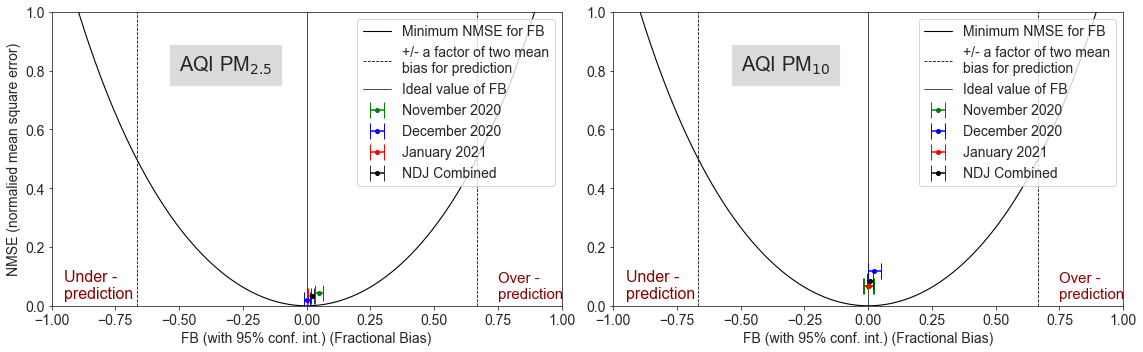

In [49]:
# PM2.5

x_coords = np.linspace(-1.99999,1.99999,1000)
y_coords = [(4 * x**2) / ((4 - x**2)) for x in x_coords]
ylim = 1
yval = [val for val in range(0,ylim+1)]

fig = plt.figure(figsize=(16, 5))

plt.subplot(121)
plt.plot(x_coords, y_coords, color='k', linewidth=1.1, label = 'Minimum NMSE for FB')
plt.plot(np.ones(ylim+1)*(-2/3), yval, color='k', linestyle = '--', linewidth=0.8, label = '+/- a factor of two mean\n' + 'bias for prediction')
plt.plot(np.ones(ylim+1)*(2/3), yval, color='k', linestyle = '--', linewidth=0.8)
plt.plot(np.zeros(ylim+1),yval,color='k', linestyle = '-', linewidth=0.7, label='Ideal value of FB')

# November
# plt.errorbar(median, y, xerr=np.array([[lower_quartile ,upper_quartile]]).T, 
#         fmt='ko')

(_, caps, _) = plt.errorbar(0.0472, 0.0441, xerr = error_25nov,
                            alpha=1.0, fmt='go', markersize=4,
                            capsize=8, label='November 2020')

(_, caps, _) = plt.errorbar(0.0023, 0.0206, xerr = error_25dec,
                            alpha=1.0, fmt='bo', markersize=4,
                            capsize=8, label='December 2020')

(_, caps, _) = plt.errorbar(0.0204, 0.0341, xerr = error_25jan,
                            alpha=1.0, fmt='ro', markersize=4,
                            capsize=8, label='January 2021')

(_, caps, _) = plt.errorbar(0.0231, 0.0329, xerr = error_25,
                            alpha=1.0, fmt='ko', markersize=4,
                            capsize=8, label='NDJ Combined')

for cap in caps:
    cap.set_markeredgewidth(0.8)
    
#text
plt.text(-0.5, 0.8, 'AQI PM$_{2.5}$', style='normal', fontsize=20, bbox={'facecolor': 'lightgray', 'alpha': 0.8, 'pad': 10})

plt.text(-0.95, 0.025, 'Under -\n' + 'prediction', fontsize=16,  color='darkred')
plt.text(0.75, 0.025, 'Over -\n' + 'prediction', fontsize=15,  color='darkred')

plt.ylim(0,ylim)
plt.xlim(-1,1)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'both', which = 'minor', labelsize = 14)
plt.legend()
plt.legend(loc=1, prop={'size': 14})
plt.xlabel("FB (with 95% conf. int.) (Fractional Bias)", fontsize = 14)
plt.ylabel("NMSE (normalied mean square error)", fontsize = 14)


plt.subplot(122)
plt.plot(x_coords, y_coords, color='k', linewidth=1.1, label = 'Minimum NMSE for FB')
plt.plot(np.ones(ylim+1)*(-2/3), yval, color='k', linestyle = '--', linewidth=0.8, label = '+/- a factor of two mean\n' + 'bias for prediction')
plt.plot(np.ones(ylim+1)*(2/3), yval, color='k', linestyle = '--', linewidth=0.8)
plt.plot(np.zeros(ylim+1),yval,color='k', linestyle = '-', linewidth=0.7, label='Ideal value of FB')

# November
# plt.errorbar(median, y, xerr=np.array([[lower_quartile ,upper_quartile]]).T, 
#         fmt='ko')

(_, caps, _) = plt.errorbar(0.00139, 0.0666, xerr = error_10nov,
                            alpha=1.0, fmt='go', markersize=4,
                            capsize=8, label='November 2020')

(_, caps, _) = plt.errorbar(0.0243, 0.1183, xerr = error_10dec,
                            alpha=1.0, fmt='bo', markersize=4,
                            capsize=8, label='December 2020')

(_, caps, _) = plt.errorbar(-0.00205, 0.0681, xerr = error_10jan,
                            alpha=1.0, fmt='ro', markersize=4,
                            capsize=8, label='January 2021')

(_, caps, _) = plt.errorbar(0.0081, 0.085, xerr = error_10,
                            alpha=1.0, fmt='ko', markersize=4,
                            capsize=8, label='NDJ Combined')

for cap in caps:
    cap.set_markeredgewidth(0.8)

#text
plt.text(-0.5, 0.8, 'AQI PM$_{10}$', style='normal', fontsize=20, bbox={'facecolor': 'lightgray', 'alpha': 0.8, 'pad': 10})

plt.text(-0.95, 0.025, 'Under -\n' + 'prediction', fontsize=16,  color='darkred')
plt.text(0.75, 0.025, 'Over -\n' + 'prediction', fontsize=15,  color='darkred')

plt.ylim(0,ylim)
plt.xlim(-1,1)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'both', which = 'minor', labelsize = 14)
plt.legend()
plt.legend(loc=1, prop={'size': 14})
plt.xlabel("FB (with 95% conf. int.) (Fractional Bias)", fontsize = 14)
# plt.ylabel("NMSE (normalied mean square error)", fontsize = 14)

fig.tight_layout()
plt.savefig('./images/extra/bstrap_pm.pdf', dpi=300)

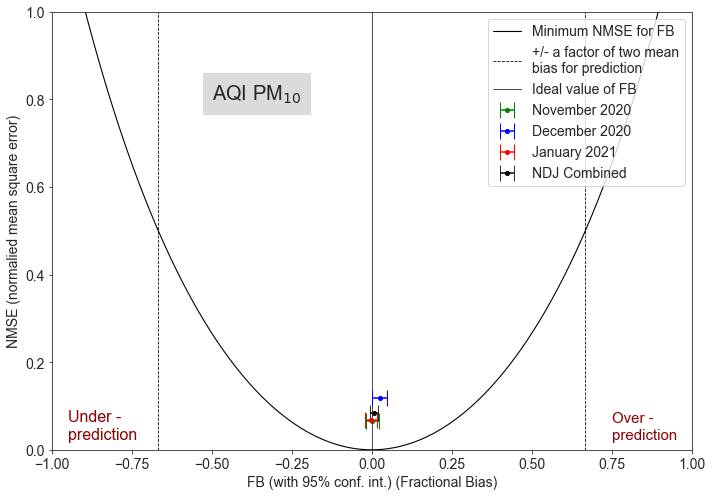

In [42]:
# # PM10

# x_coords = np.linspace(-1.99999,1.99999,1000)
# y_coords = [(4 * x**2) / ((4 - x**2)) for x in x_coords]
# ylim = 1
# yval = [val for val in range(0,ylim+1)]

# fig, ax = plt.subplots(figsize=(10, 7))

# ax.plot(x_coords, y_coords, color='k', linewidth=1.1, label = 'Minimum NMSE for FB')
# ax.plot(np.ones(ylim+1)*(-2/3), yval, color='k', linestyle = '--', linewidth=0.8, label = '+/- a factor of two mean\n' + 'bias for prediction')
# ax.plot(np.ones(ylim+1)*(2/3), yval, color='k', linestyle = '--', linewidth=0.8)
# ax.plot(np.zeros(ylim+1),yval,color='k', linestyle = '-', linewidth=0.7, label='Ideal value of FB')

# # November
# # plt.errorbar(median, y, xerr=np.array([[lower_quartile ,upper_quartile]]).T, 
# #         fmt='ko')

# (_, caps, _) = plt.errorbar(0.00139, 0.0666, xerr = error_10nov,
#                             alpha=1.0, fmt='go', markersize=4,
#                             capsize=8, label='November 2020')

# (_, caps, _) = plt.errorbar(0.0243, 0.1183, xerr = error_10dec,
#                             alpha=1.0, fmt='bo', markersize=4,
#                             capsize=8, label='December 2020')

# (_, caps, _) = plt.errorbar(-0.00205, 0.0681, xerr = error_10jan,
#                             alpha=1.0, fmt='ro', markersize=4,
#                             capsize=8, label='January 2021')

# (_, caps, _) = plt.errorbar(0.0081, 0.085, xerr = error_10,
#                             alpha=1.0, fmt='ko', markersize=4,
#                             capsize=8, label='NDJ Combined')

# for cap in caps:
#     cap.set_markeredgewidth(0.8)

# #text
# ax.text(-0.5, 0.8, 'AQI PM$_{10}$', style='normal', fontsize=20, bbox={'facecolor': 'lightgray', 'alpha': 0.8, 'pad': 10})

# ax.text(-0.95, 0.025, 'Under -\n' + 'prediction', fontsize=16,  color='darkred')
# ax.text(0.75, 0.025, 'Over -\n' + 'prediction', fontsize=15,  color='darkred')

# ax.set_ylim(0,ylim)
# ax.set_xlim(-1,1)
# ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
# ax.tick_params(axis = 'both', which = 'minor', labelsize = 14)
# plt.legend()
# plt.legend(loc=1, prop={'size': 14})
# plt.xlabel("FB (with 95% conf. int.) (Fractional Bias)", fontsize = 14)
# plt.ylabel("NMSE (normalied mean square error)", fontsize = 14)
# fig.tight_layout()
# plt.savefig('./images/extra/bstrap_pm10.pdf', dpi=300)

## Same for met data

In [44]:
dfnov = pd.read_csv('./data/met_data_nov_utc.csv')
dfdec = pd.read_csv('./data/met_data_dec_utc.csv')
dfjan = pd.read_csv('./data/met_data_jan_utc.csv')

In [45]:
dfnov['datetime'] = pd.to_datetime(dfnov.date) + pd.to_timedelta(dfnov.hour)
dfdec['datetime'] = pd.to_datetime(dfdec.time)
dfjan['datetime'] = pd.to_datetime(dfjan.datetime)

In [46]:
dfnov = dfnov.set_index(dfnov.datetime)
dfdec = dfdec.set_index(dfdec.datetime)
dfjan = dfjan.set_index(dfjan.datetime)

dfnov.drop(['date', 'hour', 'datetime'], axis=1, inplace=True)
dfdec.drop(['time', 'datetime'], axis=1, inplace=True)
dfjan.drop(['datetime'], axis=1, inplace=True)

In [47]:
# Add the missing values of datetime in November and December as NaN

idx_nov = pd.date_range('2020-11-01 00:00:00','2020-11-30 23:00:00', freq='H')
idx_dec = pd.date_range('2020-12-01 00:00:00','2020-12-31 23:00:00', freq='H')

dfnov = dfnov.reindex(idx_nov, fill_value=np.nan)
dfdec = dfdec.reindex(idx_dec, fill_value=np.nan)

In [48]:
dfnov.loc[dfnov.index.hour == 9, 'mod_swdown'] = np.nan
dfnov.loc[dfnov.index.hour == 9, 'mod_ws'] = np.nan
dfnov.loc[dfnov.index.hour == 9, 'mod_wd'] = np.nan

dfdec.loc[dfdec.index.hour == 9, 'mod_swdown'] = np.nan
dfdec.loc[dfdec.index.hour == 9, 'mod_ws'] = np.nan
dfdec.loc[dfdec.index.hour == 9, 'mod_wd'] = np.nan

dfjan.loc[dfjan.index.hour == 9, 'mod_swdown'] = np.nan
dfjan.loc[dfjan.index.hour == 9, 'mod_ws'] = np.nan
dfjan.loc[dfjan.index.hour == 9, 'mod_wd'] = np.nan

In [49]:
df = pd.concat([dfnov, dfdec, dfjan], axis=0)

In [50]:
df.shape

(2208, 11)

In [61]:
percentiles_temp_nov = bstrap(dfnov, type='temp')
percentiles_temp_dec = bstrap(dfdec, type='temp')
percentiles_temp_jan = bstrap(dfjan, type='temp')
percentiles_temp = bstrap(df, type='temp')

percentiles_swdown_nov = bstrap(dfnov, type='swdown')
percentiles_swdown_dec = bstrap(dfdec, type='swdown')
percentiles_swdown_jan = bstrap(dfjan, type='swdown')
percentiles_swdown = bstrap(df, type='swdown')

percentiles_ws_nov = bstrap(dfnov, type='ws')
percentiles_ws_dec = bstrap(dfdec, type='ws')
percentiles_ws_jan = bstrap(dfjan, type='ws')
percentiles_ws = bstrap(df, type='ws')

percentiles_wd_nov = bstrap(dfnov, type='wd')
percentiles_wd_dec = bstrap(dfdec, type='wd')
percentiles_wd_jan = bstrap(dfjan, type='wd')
percentiles_wd = bstrap(df, type='wd')

### November

In [62]:
print("The vals are for November - ")

# print("FB 25:", percentiles_fb25nov)
# print("FB 10:", percentiles_fb10nov)
print("FB temp:", percentiles_temp_nov)
print("FB swdown:", percentiles_swdown_nov)
print("FB ws:", percentiles_ws_nov)
print("FB wd:", percentiles_wd_nov)

The vals are for November - 
FB temp: [0.13426559 0.14422881]
FB swdown: [0.23970409 0.29779294]
FB ws: [0.28065084 0.35782169]
FB wd: [0.00784018 0.07610361]


In [66]:
lower_temp_nov, upper_temp_nov = 0.1391 - percentiles_temp_nov[0], percentiles_temp_nov[1] - 0.1391

error_temp_nov = np.array([[lower_temp_nov, upper_temp_nov]]).T
print(error_temp_nov)

[[0.00483441]
 [0.00512881]]


In [2]:
# error_temp_nov = np.array([[0.00483441, 0.00512881]]).T

In [67]:
lower_swdown_nov, upper_swdown_nov = 0.2681 - percentiles_swdown_nov[0], percentiles_swdown_nov[1] - 0.2681

error_swdown_nov = np.array([[lower_swdown_nov, upper_swdown_nov]]).T
print(error_swdown_nov)

[[0.02839591]
 [0.02969294]]


In [3]:
# error_swdown_nov = np.array([[0.02839591, 0.02969294]]).T

In [71]:
lower_ws_nov, upper_ws_nov = 0.32 - percentiles_ws_nov[0], percentiles_ws_nov[1] - 0.32

error_ws_nov = np.array([[lower_ws_nov, upper_ws_nov]]).T
print(error_ws_nov)

[[0.03934916]
 [0.03782169]]


In [4]:
# error_ws_nov = np.array([[0.03934916, 0.03782169]]).T

In [73]:
lower_wd_nov, upper_wd_nov = 0.042 - percentiles_wd_nov[0], percentiles_wd_nov[1] - 0.042

error_wd_nov = np.array([[lower_wd_nov, upper_wd_nov]]).T
print(error_wd_nov)

[[0.03415982]
 [0.03410361]]


In [5]:
# error_wd_nov = np.array([[0.03415982, 0.03410361]]).T

### December

In [74]:
print("The vals are for December - ")

# print("FB 25:", percentiles_fb25nov)
# print("FB 10:", percentiles_fb10nov)
print("FB temp:", percentiles_temp_dec)
print("FB swdown:", percentiles_swdown_dec)
print("FB ws:", percentiles_ws_dec)
print("FB wd:", percentiles_wd_dec)

The vals are for December - 
FB temp: [0.16429297 0.18120532]
FB swdown: [0.19655085 0.23634676]
FB ws: [0.08866553 0.15876578]
FB wd: [0.05537414 0.11095463]


In [75]:
lower_temp_dec, upper_temp_dec = 0.1725 - percentiles_temp_dec[0], percentiles_temp_dec[1] - 0.1725

error_temp_dec = np.array([[lower_temp_dec, upper_temp_dec]]).T
print(error_temp_dec)

[[0.00820703]
 [0.00870532]]


In [6]:
# error_temp_dec = np.array([[0.00820703, 0.00870532]]).T

In [76]:
lower_swdown_dec, upper_swdown_dec = 0.2158 - percentiles_swdown_dec[0], percentiles_swdown_dec[1] - 0.2158

error_swdown_dec = np.array([[lower_swdown_dec, upper_swdown_dec]]).T
print(error_swdown_dec)

[[0.01924915]
 [0.02054676]]


In [7]:
# error_swdown_dec = np.array([[0.01924915, 0.02054676]]).T

In [77]:
lower_ws_dec, upper_ws_dec = 0.1237 - percentiles_ws_dec[0], percentiles_ws_dec[1] - 0.1237

error_ws_dec = np.array([[lower_ws_dec, upper_ws_dec]]).T
print(error_ws_dec)

[[0.03503447]
 [0.03506578]]


In [8]:
# error_ws_dec = np.array([[0.03503447, 0.03506578]]).T

In [78]:
lower_wd_dec, upper_wd_dec = 0.0827 - percentiles_wd_dec[0], percentiles_wd_dec[1] - 0.0827

error_wd_dec = np.array([[lower_wd_dec, upper_wd_dec]]).T
print(error_wd_dec)

[[0.02732586]
 [0.02825463]]


In [9]:
# error_wd_dec = np.array([[0.02732586, 0.02825463]]).T

### January

In [63]:
print("The vals are for January - ")

# print("FB 25:", percentiles_fb25nov)
# print("FB 10:", percentiles_fb10nov)
print("FB temp:", percentiles_temp_jan)
print("FB swdown:", percentiles_swdown_jan)
print("FB ws:", percentiles_ws_jan)
print("FB wd:", percentiles_wd_jan)

The vals are for January - 
FB temp: [0.2234497  0.24535376]
FB swdown: [0.26235041 0.38890473]
FB ws: [0.0333827  0.12604697]
FB wd: [0.0013359  0.06131605]


In [79]:
lower_temp_jan, upper_temp_jan = 0.2342 - percentiles_temp_jan[0], percentiles_temp_jan[1] - 0.2342

error_temp_jan = np.array([[lower_temp_jan, upper_temp_jan]]).T
print(error_temp_jan)

[[0.0107503 ]
 [0.01115376]]


In [10]:
# error_temp_jan = np.array([[0.0107503, 0.01115376]]).T

In [80]:
lower_swdown_jan, upper_swdown_jan = 0.3241 - percentiles_swdown_jan[0], percentiles_swdown_jan[1] - 0.3241

error_swdown_jan = np.array([[lower_swdown_jan, upper_swdown_jan]]).T
print(error_swdown_jan)

[[0.06174959]
 [0.06480473]]


In [11]:
# error_swdown_jan = np.array([[0.06174959, 0.06480473]]).T

In [81]:
lower_ws_jan, upper_ws_jan = 0.0807 - percentiles_ws_jan[0], percentiles_ws_jan[1] - 0.0807

error_ws_jan = np.array([[lower_ws_jan, upper_ws_jan]]).T
print(error_ws_jan)

[[0.0473173 ]
 [0.04534697]]


In [12]:
# error_ws_jan = np.array([[0.0473173, 0.04534697]]).T

In [82]:
lower_wd_jan, upper_wd_jan = 0.0316 - percentiles_wd_jan[0], percentiles_wd_jan[1] - 0.0316

error_wd_jan = np.array([[lower_wd_jan, upper_wd_jan]]).T
print(error_wd_jan)

[[0.0302641 ]
 [0.02971605]]


In [13]:
# error_wd_jan = np.array([[0.0302641, 0.02971605]]).T

### Overall

In [65]:
print("The vals are for overall - ")

# print("FB 25:", percentiles_fb25nov)
# print("FB 10:", percentiles_fb10nov)
print("FB temp:", percentiles_temp)
print("FB swdown:", percentiles_swdown)
print("FB ws:", percentiles_ws)
print("FB wd:", percentiles_wd)

The vals are for overall - 
FB temp: [0.17279226 0.18280989]
FB swdown: [0.2460352 0.2949731]
FB ws: [0.14161611 0.19098313]
FB wd: [0.03521423 0.0710911 ]


In [83]:
lower_temp, upper_temp = 0.1776 - percentiles_temp[0], percentiles_temp[1] - 0.1776

error_temp = np.array([[lower_temp, upper_temp]]).T
print(error_temp)

[[0.00480774]
 [0.00520989]]


In [14]:
# error_temp = np.array([[0.00480774, 0.00520989]]).T

In [84]:
lower_swdown, upper_swdown = 0.2701 - percentiles_swdown[0], percentiles_swdown[1] - 0.2701

error_swdown = np.array([[lower_swdown, upper_swdown]]).T
print(error_swdown)

[[0.0240648]
 [0.0248731]]


In [15]:
# error_swdown = np.array([[0.0240648, 0.0248731]]).T

In [85]:
lower_ws, upper_ws = 0.1663 - percentiles_ws[0], percentiles_ws[1] - 0.1663

error_ws = np.array([[lower_ws, upper_ws]]).T
print(error_ws)

[[0.02468389]
 [0.02468313]]


In [16]:
# error_ws = np.array([[0.02468389, 0.02468313]]).T

In [86]:
lower_wd, upper_wd = 0.0533 - percentiles_wd[0], percentiles_wd[1] - 0.0533

error_wd = np.array([[lower_wd, upper_wd]]).T
print(error_wd)

[[0.01808577]
 [0.0177911 ]]


In [17]:
# error_wd = np.array([[0.01808577, 0.0177911]]).T

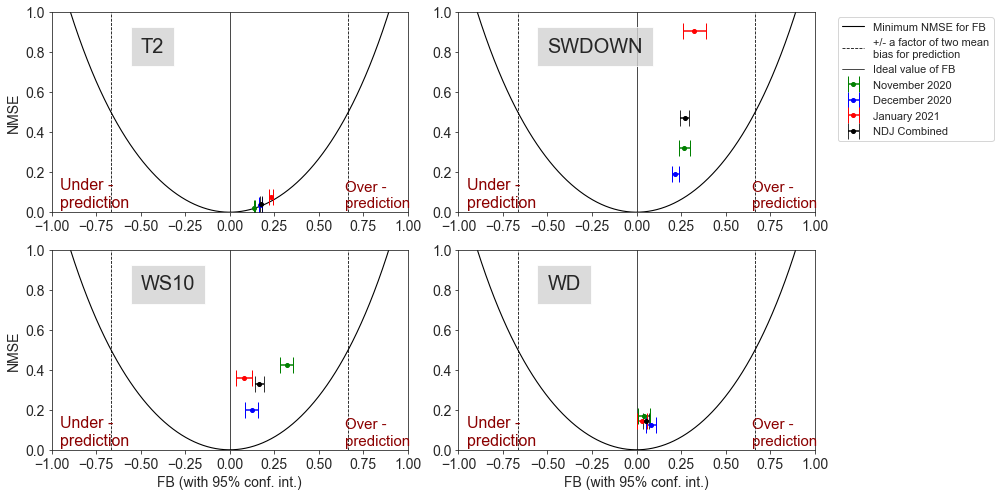

In [26]:
# met

#temp
x_coords = np.linspace(-1.99999,1.99999,1000)
y_coords = [(4 * x**2) / ((4 - x**2)) for x in x_coords]
ylim = 1
yval = [val for val in range(0,ylim+1)]

fig = plt.figure(figsize=(14, 7))

plt.subplot(221)
plt.plot(x_coords, y_coords, color='k', linewidth=1.1, label = 'Minimum NMSE for FB')
plt.plot(np.ones(ylim+1)*(-2/3), yval, color='k', linestyle = '--', linewidth=0.8, label = '+/- a factor of two mean\n' + 'bias for prediction')
plt.plot(np.ones(ylim+1)*(2/3), yval, color='k', linestyle = '--', linewidth=0.8)
plt.plot(np.zeros(ylim+1),yval,color='k', linestyle = '-', linewidth=0.7, label='Ideal value of FB')

# November
# plt.errorbar(median, y, xerr=np.array([[lower_quartile ,upper_quartile]]).T, 
#         fmt='ko')

(_, caps, _) = plt.errorbar(0.1391, 0.0223, xerr = error_temp_nov,
                            alpha=1.0, fmt='go', markersize=4,
                            capsize=8, label='November 2020')

(_, caps, _) = plt.errorbar(0.1725, 0.0361, xerr = error_temp_dec,
                            alpha=1.0, fmt='bo', markersize=4,
                            capsize=8, label='December 2020')

(_, caps, _) = plt.errorbar(0.2342, 0.0758, xerr = error_temp_jan,
                            alpha=1.0, fmt='ro', markersize=4,
                            capsize=8, label='January 2021')

(_, caps, _) = plt.errorbar(0.1776, 0.0402, xerr = error_temp,
                            alpha=1.0, fmt='ko', markersize=4,
                            capsize=8, label='NDJ Combined')

for cap in caps:
    cap.set_markeredgewidth(0.8)

#text
plt.text(-0.5, 0.8, 'T2', style='normal', fontsize=20, bbox={'facecolor': 'lightgray', 'alpha': 0.8, 'pad': 10})

plt.text(-0.95, 0.025, 'Under -\n' + 'prediction', fontsize=16,  color='darkred')
plt.text(0.65, 0.025, 'Over -\n' + 'prediction', fontsize=15,  color='darkred')

plt.ylim(0,ylim)
plt.xlim(-1,1)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'both', which = 'minor', labelsize = 14)
# plt.legend()
# plt.legend(loc=1, prop={'size': 11})
# plt.xlabel("FB (with 95% conf. int.) (Fractional Bias)", fontsize = 14)
plt.ylabel("NMSE", fontsize = 14)


# swdown

plt.subplot(222)
plt.plot(x_coords, y_coords, color='k', linewidth=1.1, label = 'Minimum NMSE for FB')
plt.plot(np.ones(ylim+1)*(-2/3), yval, color='k', linestyle = '--', linewidth=0.8, label = '+/- a factor of two mean\n' + 'bias for prediction')
plt.plot(np.ones(ylim+1)*(2/3), yval, color='k', linestyle = '--', linewidth=0.8)
plt.plot(np.zeros(ylim+1),yval,color='k', linestyle = '-', linewidth=0.7, label='Ideal value of FB')

# November
# plt.errorbar(median, y, xerr=np.array([[lower_quartile ,upper_quartile]]).T, 
#         fmt='ko')

(_, caps, _) = plt.errorbar(0.2681, 0.3199, xerr = error_swdown_nov,
                            alpha=1.0, fmt='go', markersize=4,
                            capsize=8, label='November 2020')

(_, caps, _) = plt.errorbar(0.2158, 0.1901, xerr = error_swdown_dec,
                            alpha=1.0, fmt='bo', markersize=4,
                            capsize=8, label='December 2020')

(_, caps, _) = plt.errorbar(0.3241, 0.9051, xerr = error_swdown_jan,
                            alpha=1.0, fmt='ro', markersize=4,
                            capsize=8, label='January 2021')

(_, caps, _) = plt.errorbar(0.2701, 0.4714, xerr = error_swdown,
                            alpha=1.0, fmt='ko', markersize=4,
                            capsize=8, label='NDJ Combined')

for cap in caps:
    cap.set_markeredgewidth(0.8)

#text
plt.text(-0.5, 0.8, 'SWDOWN', style='normal', fontsize=20, bbox={'facecolor': 'lightgray', 'alpha': 0.8, 'pad': 10})

plt.text(-0.95, 0.025, 'Under -\n' + 'prediction', fontsize=16,  color='darkred')
plt.text(0.65, 0.025, 'Over -\n' + 'prediction', fontsize=15,  color='darkred')

plt.ylim(0,ylim)
plt.xlim(-1,1)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'both', which = 'minor', labelsize = 14)
# plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', prop={'size': 11})
# plt.xlabel("FB (with 95% conf. int.) (Fractional Bias)", fontsize = 14)
# plt.ylabel("NMSE (normalied mean square error)", fontsize = 14)
fig.tight_layout()
plt.savefig('./images/extra/bstrap_swdown.pdf', dpi=300)

# ws

plt.subplot(223)
plt.plot(x_coords, y_coords, color='k', linewidth=1.1, label = 'Minimum NMSE for FB')
plt.plot(np.ones(ylim+1)*(-2/3), yval, color='k', linestyle = '--', linewidth=0.8, label = '+/- a factor of two mean\n' + 'bias for prediction')
plt.plot(np.ones(ylim+1)*(2/3), yval, color='k', linestyle = '--', linewidth=0.8)
plt.plot(np.zeros(ylim+1),yval,color='k', linestyle = '-', linewidth=0.7, label='Ideal value of FB')

# November
# plt.errorbar(median, y, xerr=np.array([[lower_quartile ,upper_quartile]]).T, 
#         fmt='ko')

(_, caps, _) = plt.errorbar(0.32, 0.4233, xerr = error_ws_nov,
                            alpha=1.0, fmt='go', markersize=4,
                            capsize=8, label='November 2020')

(_, caps, _) = plt.errorbar(0.1237, 0.2003, xerr = error_ws_dec,
                            alpha=1.0, fmt='bo', markersize=4,
                            capsize=8, label='December 2020')

(_, caps, _) = plt.errorbar(0.0807, 0.3569, xerr = error_ws_jan,
                            alpha=1.0, fmt='ro', markersize=4,
                            capsize=8, label='January 2021')

(_, caps, _) = plt.errorbar(0.1663, 0.3281, xerr = error_ws,
                            alpha=1.0, fmt='ko', markersize=4,
                            capsize=8, label='NDJ Combined')

for cap in caps:
    cap.set_markeredgewidth(0.8)

#text
plt.text(-0.5, 0.8, 'WS10', style='normal', fontsize=20, bbox={'facecolor': 'lightgray', 'alpha': 0.8, 'pad': 10})

plt.text(-0.95, 0.025, 'Under -\n' + 'prediction', fontsize=16,  color='darkred')
plt.text(0.65, 0.025, 'Over -\n' + 'prediction', fontsize=15,  color='darkred')

plt.ylim(0,ylim)
plt.xlim(-1,1)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'both', which = 'minor', labelsize = 14)
# plt.legend()
# plt.legend(loc=1, prop={'size': 14})
plt.xlabel("FB (with 95% conf. int.)", fontsize = 14)
plt.ylabel("NMSE", fontsize = 14)


# wd

plt.subplot(224)
plt.plot(x_coords, y_coords, color='k', linewidth=1.1, label = 'Minimum NMSE for FB')
plt.plot(np.ones(ylim+1)*(-2/3), yval, color='k', linestyle = '--', linewidth=0.8, label = '+/- a factor of two mean\n' + 'bias for prediction')
plt.plot(np.ones(ylim+1)*(2/3), yval, color='k', linestyle = '--', linewidth=0.8)
plt.plot(np.zeros(ylim+1),yval,color='k', linestyle = '-', linewidth=0.7, label='Ideal value of FB')

# November
# plt.errorbar(median, y, xerr=np.array([[lower_quartile ,upper_quartile]]).T, 
#         fmt='ko')

(_, caps, _) = plt.errorbar(0.042, 0.1705, xerr = error_wd_nov,
                            alpha=1.0, fmt='go', markersize=4,
                            capsize=8, label='November 2020')

(_, caps, _) = plt.errorbar(0.0827, 0.1261, xerr = error_wd_dec,
                            alpha=1.0, fmt='bo', markersize=4,
                            capsize=8, label='December 2020')

(_, caps, _) = plt.errorbar(0.0316, 0.1451, xerr = error_wd_jan,
                            alpha=1.0, fmt='ro', markersize=4,
                            capsize=8, label='January 2021')

(_, caps, _) = plt.errorbar(0.0533, 0.1454, xerr = error_wd,
                            alpha=1.0, fmt='ko', markersize=4,
                            capsize=8, label='NDJ Combined')

for cap in caps:
    cap.set_markeredgewidth(0.8)

#text
plt.text(-0.5, 0.8, 'WD', style='normal', fontsize=20, bbox={'facecolor': 'lightgray', 'alpha': 0.8, 'pad': 10})

plt.text(-0.95, 0.025, 'Under -\n' + 'prediction', fontsize=16,  color='darkred')
plt.text(0.65, 0.025, 'Over -\n' + 'prediction', fontsize=15,  color='darkred')

plt.ylim(0,ylim)
plt.xlim(-1,1)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'both', which = 'minor', labelsize = 14)
# plt.legend()
# plt.legend(loc=1, prop={'size': 14})
plt.xlabel("FB (with 95% conf. int.)", fontsize = 14)
# plt.ylabel("NMSE (normalied mean square error)", fontsize = 14)

fig.tight_layout()
plt.savefig('./images/extra/bstrap_met.pdf', dpi=300)

In [ ]:
# # swdown

# x_coords = np.linspace(-1.99999,1.99999,1000)
# y_coords = [(4 * x**2) / ((4 - x**2)) for x in x_coords]
# ylim = 1
# yval = [val for val in range(0,ylim+1)]

# fig, ax = plt.subplots(figsize=(10, 7))

# ax.plot(x_coords, y_coords, color='k', linewidth=1.1, label = 'Minimum NMSE for FB')
# ax.plot(np.ones(ylim+1)*(-2/3), yval, color='k', linestyle = '--', linewidth=0.8, label = '+/- a factor of two mean\n' + 'bias for prediction')
# ax.plot(np.ones(ylim+1)*(2/3), yval, color='k', linestyle = '--', linewidth=0.8)
# ax.plot(np.zeros(ylim+1),yval,color='k', linestyle = '-', linewidth=0.7, label='Ideal value of FB')

# # November
# # plt.errorbar(median, y, xerr=np.array([[lower_quartile ,upper_quartile]]).T, 
# #         fmt='ko')

# (_, caps, _) = plt.errorbar(0.2681, 0.3199, xerr = error_swdown_nov,
#                             alpha=1.0, fmt='go', markersize=4,
#                             capsize=8, label='November 2020')

# (_, caps, _) = plt.errorbar(0.2158, 0.1901, xerr = error_swdown_dec,
#                             alpha=1.0, fmt='bo', markersize=4,
#                             capsize=8, label='December 2020')

# (_, caps, _) = plt.errorbar(0.3241, 0.9051, xerr = error_swdown_jan,
#                             alpha=1.0, fmt='ro', markersize=4,
#                             capsize=8, label='January 2021')

# (_, caps, _) = plt.errorbar(0.2701, 0.4714, xerr = error_swdown,
#                             alpha=1.0, fmt='ko', markersize=4,
#                             capsize=8, label='NDJ Combined')

# for cap in caps:
#     cap.set_markeredgewidth(0.8)

# #text
# ax.text(-0.5, 0.8, 'SWDOWN', style='normal', fontsize=20, bbox={'facecolor': 'lightgray', 'alpha': 0.8, 'pad': 10})

# ax.text(-0.95, 0.025, 'Under -\n' + 'prediction', fontsize=16,  color='darkred')
# ax.text(0.75, 0.025, 'Over -\n' + 'prediction', fontsize=15,  color='darkred')

# ax.set_ylim(0,ylim)
# ax.set_xlim(-1,1)
# ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
# ax.tick_params(axis = 'both', which = 'minor', labelsize = 14)
# plt.legend()
# plt.legend(loc=1, prop={'size': 14})
# plt.xlabel("FB (with 95% conf. int.) (Fractional Bias)", fontsize = 14)
# plt.ylabel("NMSE (normalied mean square error)", fontsize = 14)
# fig.tight_layout()
# plt.savefig('./images/extra/bstrap_swdown.pdf', dpi=300)

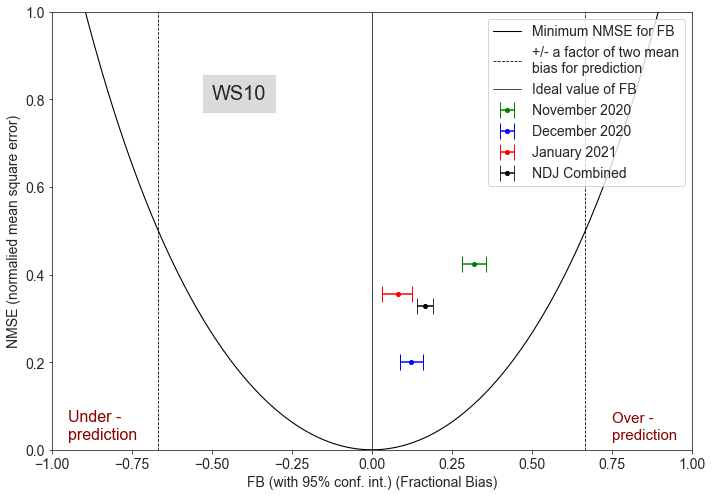

In [99]:
# # ws

# x_coords = np.linspace(-1.99999,1.99999,1000)
# y_coords = [(4 * x**2) / ((4 - x**2)) for x in x_coords]
# ylim = 1
# yval = [val for val in range(0,ylim+1)]

# fig, ax = plt.subplots(figsize=(10, 7))

# ax.plot(x_coords, y_coords, color='k', linewidth=1.1, label = 'Minimum NMSE for FB')
# ax.plot(np.ones(ylim+1)*(-2/3), yval, color='k', linestyle = '--', linewidth=0.8, label = '+/- a factor of two mean\n' + 'bias for prediction')
# ax.plot(np.ones(ylim+1)*(2/3), yval, color='k', linestyle = '--', linewidth=0.8)
# ax.plot(np.zeros(ylim+1),yval,color='k', linestyle = '-', linewidth=0.7, label='Ideal value of FB')

# # November
# # plt.errorbar(median, y, xerr=np.array([[lower_quartile ,upper_quartile]]).T, 
# #         fmt='ko')

# (_, caps, _) = plt.errorbar(0.32, 0.4233, xerr = error_ws_nov,
#                             alpha=1.0, fmt='go', markersize=4,
#                             capsize=8, label='November 2020')

# (_, caps, _) = plt.errorbar(0.1237, 0.2003, xerr = error_ws_dec,
#                             alpha=1.0, fmt='bo', markersize=4,
#                             capsize=8, label='December 2020')

# (_, caps, _) = plt.errorbar(0.0807, 0.3569, xerr = error_ws_jan,
#                             alpha=1.0, fmt='ro', markersize=4,
#                             capsize=8, label='January 2021')

# (_, caps, _) = plt.errorbar(0.1663, 0.3281, xerr = error_ws,
#                             alpha=1.0, fmt='ko', markersize=4,
#                             capsize=8, label='NDJ Combined')

# for cap in caps:
#     cap.set_markeredgewidth(0.8)

# #text
# ax.text(-0.5, 0.8, 'WS10', style='normal', fontsize=20, bbox={'facecolor': 'lightgray', 'alpha': 0.8, 'pad': 10})

# ax.text(-0.95, 0.025, 'Under -\n' + 'prediction', fontsize=16,  color='darkred')
# ax.text(0.75, 0.025, 'Over -\n' + 'prediction', fontsize=15,  color='darkred')

# ax.set_ylim(0,ylim)
# ax.set_xlim(-1,1)
# ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
# ax.tick_params(axis = 'both', which = 'minor', labelsize = 14)
# plt.legend()
# plt.legend(loc=1, prop={'size': 14})
# plt.xlabel("FB (with 95% conf. int.) (Fractional Bias)", fontsize = 14)
# plt.ylabel("NMSE (normalied mean square error)", fontsize = 14)
# fig.tight_layout()
# plt.savefig('./images/extra/bstrap_ws.pdf', dpi=300)

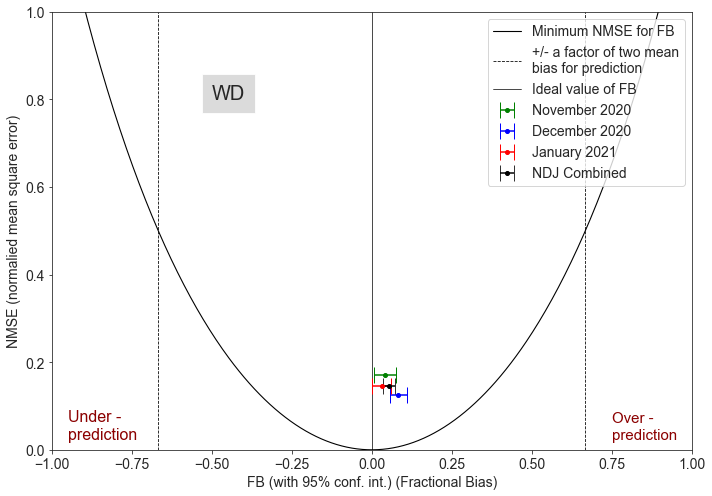

In [100]:
# # wd

# x_coords = np.linspace(-1.99999,1.99999,1000)
# y_coords = [(4 * x**2) / ((4 - x**2)) for x in x_coords]
# ylim = 1
# yval = [val for val in range(0,ylim+1)]

# fig, ax = plt.subplots(figsize=(10, 7))

# ax.plot(x_coords, y_coords, color='k', linewidth=1.1, label = 'Minimum NMSE for FB')
# ax.plot(np.ones(ylim+1)*(-2/3), yval, color='k', linestyle = '--', linewidth=0.8, label = '+/- a factor of two mean\n' + 'bias for prediction')
# ax.plot(np.ones(ylim+1)*(2/3), yval, color='k', linestyle = '--', linewidth=0.8)
# ax.plot(np.zeros(ylim+1),yval,color='k', linestyle = '-', linewidth=0.7, label='Ideal value of FB')

# # November
# # plt.errorbar(median, y, xerr=np.array([[lower_quartile ,upper_quartile]]).T, 
# #         fmt='ko')

# (_, caps, _) = plt.errorbar(0.042, 0.1705, xerr = error_wd_nov,
#                             alpha=1.0, fmt='go', markersize=4,
#                             capsize=8, label='November 2020')

# (_, caps, _) = plt.errorbar(0.0827, 0.1261, xerr = error_wd_dec,
#                             alpha=1.0, fmt='bo', markersize=4,
#                             capsize=8, label='December 2020')

# (_, caps, _) = plt.errorbar(0.0316, 0.1451, xerr = error_wd_jan,
#                             alpha=1.0, fmt='ro', markersize=4,
#                             capsize=8, label='January 2021')

# (_, caps, _) = plt.errorbar(0.0533, 0.1454, xerr = error_wd,
#                             alpha=1.0, fmt='ko', markersize=4,
#                             capsize=8, label='NDJ Combined')

# for cap in caps:
#     cap.set_markeredgewidth(0.8)

# #text
# ax.text(-0.5, 0.8, 'WD', style='normal', fontsize=20, bbox={'facecolor': 'lightgray', 'alpha': 0.8, 'pad': 10})

# ax.text(-0.95, 0.025, 'Under -\n' + 'prediction', fontsize=16,  color='darkred')
# ax.text(0.75, 0.025, 'Over -\n' + 'prediction', fontsize=15,  color='darkred')

# ax.set_ylim(0,ylim)
# ax.set_xlim(-1,1)
# ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
# ax.tick_params(axis = 'both', which = 'minor', labelsize = 14)
# plt.legend()
# plt.legend(loc=1, prop={'size': 14})
# plt.xlabel("FB (with 95% conf. int.) (Fractional Bias)", fontsize = 14)
# plt.ylabel("NMSE (normalied mean square error)", fontsize = 14)
# fig.tight_layout()
# plt.savefig('./images/extra/bstrap_wd.pdf', dpi=300)

## Do the same for PBLH

In [102]:
dfnov = pd.read_csv('./data/pblh_nov.csv')
dfdec = pd.read_csv('./data/pblh_dec.csv')
dfjan = pd.read_csv('./data/pblh_jan.csv')

In [103]:
dfnov['datetime'] = pd.to_datetime(dfnov.datetime)
dfnov = dfnov.drop(['date', 'time'], axis=1)

dfdec['datetime'] = pd.to_datetime(dfdec.datetime)
dfjan['datetime'] = pd.to_datetime(dfjan.datetime)

In [104]:
dfnov = dfnov.set_index(dfnov.datetime)
dfdec = dfdec.set_index(dfdec.datetime)
dfjan = dfjan.set_index(dfjan.datetime)

In [105]:
dfnov = dfnov.rename(columns= {
    "pbl_stull_hgt":"obs_pbl",
    "model_pbl":"mod_pbl"
})

dfdec = dfdec.rename(columns={
    "pbl_stull_hgt":"obs_pbl",
    "model_pbl":"mod_pbl"
})

dfjan = dfjan.rename(columns={
    "pbl_stull_hgt":"obs_pbl",
    "model_pbl":"mod_pbl"
})

In [106]:
dfnov00 = dfnov.iloc[0::2,:]
dfnov12 = dfnov.iloc[1::2,:]
dfdec00 = dfdec.iloc[0::2,:]
dfdec12 = dfdec.iloc[1::2,:]
dfjan00 = dfjan.iloc[0::2,:]
dfjan12 = dfjan.iloc[1::2,:]

In [107]:
# interpolate the data

dfnov00 = dfnov00.interpolate(method='time', limit_area='inside')
dfnov12 = dfnov12.interpolate(method='time', limit_area='inside')
dfdec00 = dfdec00.interpolate(method='time', limit_area='inside')
dfdec12 = dfdec12.interpolate(method='time', limit_area='inside')
dfjan00 = dfjan00.interpolate(method='time', limit_area='inside')
dfjan12 = dfjan12.interpolate(method='time', limit_area='inside')

In [108]:
# Get overall datafram

df = pd.concat([dfnov, dfdec, dfjan], axis=0)
df00 = pd.concat([dfnov00, dfdec00, dfjan00], axis=0)
df12 = pd.concat([dfnov12, dfdec12, dfjan12], axis=0)

In [113]:
percentiles_pblh00_nov = bstrap(dfnov00, type='pblh00')
percentiles_pblh00_dec = bstrap(dfdec00, type='pblh00')
percentiles_pblh00_jan = bstrap(dfjan00, type='pblh00')
percentiles_pblh00 = bstrap(df00, type='pblh00')


percentiles_pblh12_nov = bstrap(dfnov12, type='pblh12')
percentiles_pblh12_dec = bstrap(dfdec12, type='pblh12')
percentiles_pblh12_jan = bstrap(dfjan12, type='pblh12')
percentiles_pblh12 = bstrap(df12, type='pblh12')

### November

In [130]:
print("The vals are for November - ")

# print("FB 25:", percentiles_fb25nov)
# print("FB 10:", percentiles_fb10nov)
print("FB pblh00:", percentiles_pblh00_nov)
print("FB pblh12:", percentiles_pblh12_nov)

The vals are for November - 
FB pblh00: [-0.56217759  0.04698848]
FB pblh12: [0.07869996 0.37165387]


In [131]:
lower_pblh00_nov, upper_pblh00_nov = -0.2771 - percentiles_pblh00_nov[0], percentiles_pblh00_nov[1] - (-0.2771)

error_pblh00_nov = np.array([[lower_pblh00_nov, upper_pblh00_nov]]).T
print(error_pblh00_nov)

[[0.28507759]
 [0.32408848]]


In [28]:
# error_pblh00_nov = np.array([[0.28507759, 0.32408848]]).T

In [132]:
lower_pblh12_nov, upper_pblh12_nov = 0.2091 - percentiles_pblh12_nov[0], percentiles_pblh12_nov[1] - 0.2091

error_pblh12_nov = np.array([[lower_pblh12_nov, upper_pblh12_nov]]).T
print(error_pblh12_nov)

[[0.13040004]
 [0.16255387]]


In [29]:
# error_pblh12_nov = np.array([[0.13040004, 0.16255387]]).T

### December

In [133]:
print("The vals are for December - ")

# print("FB 25:", percentiles_fb25dec)
# print("FB 10:", percentiles_fb10dec)
print("FB pblh00:", percentiles_pblh00_dec)
print("FB pblh12:", percentiles_pblh12_dec)

The vals are for December - 
FB pblh00: [-1.09907493 -0.46959275]
FB pblh12: [0.05092628 0.73863603]


In [134]:
lower_pblh00_dec, upper_pblh00_dec = -0.8231 - percentiles_pblh00_dec[0], percentiles_pblh00_dec[1] - (-0.8231)

error_pblh00_dec = np.array([[lower_pblh00_dec, upper_pblh00_dec]]).T
print(error_pblh00_dec)

[[0.27597493]
 [0.35350725]]


In [30]:
# error_pblh00_dec = np.array([[0.27597493, 0.35350725]]).T

In [135]:
lower_pblh12_dec, upper_pblh12_dec = 0.3985 - percentiles_pblh12_dec[0], percentiles_pblh12_dec[1] - 0.3985

error_pblh12_dec = np.array([[lower_pblh12_dec, upper_pblh12_dec]]).T
print(error_pblh12_dec)

[[0.34757372]
 [0.34013603]]


In [31]:
# error_pblh12_dec = np.array([[0.34757372, 0.34013603]]).T

### January

In [136]:
print("The vals are for January - ")

# print("FB 25:", percentiles_fb25dec)
# print("FB 10:", percentiles_fb10dec)
print("FB pblh00:", percentiles_pblh00_jan)
print("FB pblh12:", percentiles_pblh12_jan)

The vals are for January - 
FB pblh00: [-0.73210359 -0.17339725]
FB pblh12: [0.2269239  0.52108554]


In [137]:
lower_pblh00_jan, upper_pblh00_jan = -0.4761 - percentiles_pblh00_jan[0], percentiles_pblh00_jan[1] - (-0.4761)

error_pblh00_jan = np.array([[lower_pblh00_jan, upper_pblh00_jan]]).T
print(error_pblh00_jan)

[[0.25600359]
 [0.30270275]]


In [32]:
# error_pblh00_jan = np.array([[0.25600359, 0.30270275]]).T

In [138]:
lower_pblh12_jan, upper_pblh12_jan = 0.3642 - percentiles_pblh12_jan[0], percentiles_pblh12_jan[1] - 0.3642

error_pblh12_jan = np.array([[lower_pblh12_jan, upper_pblh12_jan]]).T
print(error_pblh12_jan)

[[0.1372761 ]
 [0.15688554]]


In [33]:
# error_pblh12_jan = np.array([[0.1372761, 0.15688554]]).T

### Overall

In [139]:
print("The vals are for Overall - ")

# print("FB 25:", percentiles_fb25dec)
# print("FB 10:", percentiles_fb10dec)
print("FB pblh00:", percentiles_pblh00)
print("FB pblh12:", percentiles_pblh12)

The vals are for Overall - 
FB pblh00: [-0.76643421 -0.37382569]
FB pblh12: [0.1794135  0.43750498]


In [140]:
lower_pblh00, upper_pblh00 = -0.5832 - percentiles_pblh00[0], percentiles_pblh00[1] - (-0.5832)

error_pblh00 = np.array([[lower_pblh00, upper_pblh00]]).T
print(error_pblh00)

[[0.18323421]
 [0.20937431]]


In [34]:
# error_pblh00 = np.array([[0.18323421, 0.20937431]]).T

In [141]:
lower_pblh12, upper_pblh12 = 0.3049- percentiles_pblh12[0], percentiles_pblh12[1] - 0.3049

error_pblh12 = np.array([[lower_pblh12, upper_pblh12]]).T
print(error_pblh12)

[[0.1254865 ]
 [0.13260498]]


In [35]:
# error_pblh12 = np.array([[0.1254865, 0.13260498]]).T

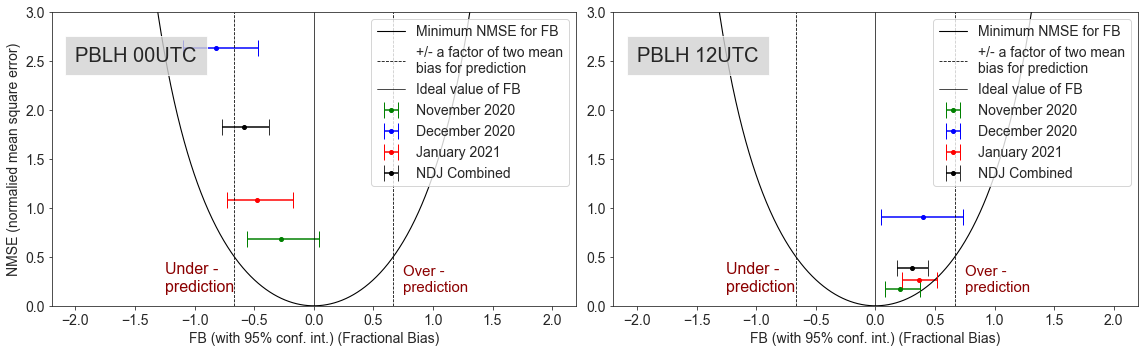

In [38]:
# pblh

x_coords = np.linspace(-1.99999,1.99999,1000)
y_coords = [(4 * x**2) / ((4 - x**2)) for x in x_coords]
ylim = 3
yval = [val for val in range(0,ylim+1)]

fig = plt.figure(figsize=(16, 5))

# Pblh00
plt.subplot(121)
plt.plot(x_coords, y_coords, color='k', linewidth=1.1, label = 'Minimum NMSE for FB')
plt.plot(np.ones(ylim+1)*(-2/3), yval, color='k', linestyle = '--', linewidth=0.8, label = '+/- a factor of two mean\n' + 'bias for prediction')
plt.plot(np.ones(ylim+1)*(2/3), yval, color='k', linestyle = '--', linewidth=0.8)
plt.plot(np.zeros(ylim+1),yval,color='k', linestyle = '-', linewidth=0.7, label='Ideal value of FB')

# November
# plt.errorbar(median, y, xerr=np.array([[lower_quartile ,upper_quartile]]).T, 
#         fmt='ko')

(_, caps, _) = plt.errorbar(-0.2771, 0.6828, xerr = error_pblh00_nov,
                            alpha=1.0, fmt='go', markersize=4,
                            capsize=8, label='November 2020')

(_, caps, _) = plt.errorbar(-0.8231, 2.6286, xerr = error_pblh00_dec,
                            alpha=1.0, fmt='bo', markersize=4,
                            capsize=8, label='December 2020')

(_, caps, _) = plt.errorbar(-0.4761, 1.0816, xerr = error_pblh00_jan,
                            alpha=1.0, fmt='ro', markersize=4,
                            capsize=8, label='January 2021')

(_, caps, _) = plt.errorbar(-0.5832, 1.8294, xerr = error_pblh00,
                            alpha=1.0, fmt='ko', markersize=4,
                            capsize=8, label='NDJ Combined')

for cap in caps:
    cap.set_markeredgewidth(0.8)

#text
plt.text(-2.0, 2.5, 'PBLH 00UTC', style='normal', fontsize=20, bbox={'facecolor': 'lightgray', 'alpha': 0.8, 'pad': 10})

plt.text(-1.25, 0.15, 'Under -\n' + 'prediction', fontsize=16,  color='darkred')
plt.text(0.75, 0.15, 'Over -\n' + 'prediction', fontsize=15,  color='darkred')

plt.ylim(0,ylim)
# plt.xlim(-1,1)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'both', which = 'minor', labelsize = 14)
plt.legend()
plt.legend(loc=1, prop={'size': 14})
plt.xlabel("FB (with 95% conf. int.) (Fractional Bias)", fontsize = 14)
plt.ylabel("NMSE (normalied mean square error)", fontsize = 14)

# pblh12

plt.subplot(122)
plt.plot(x_coords, y_coords, color='k', linewidth=1.1, label = 'Minimum NMSE for FB')
plt.plot(np.ones(ylim+1)*(-2/3), yval, color='k', linestyle = '--', linewidth=0.8, label = '+/- a factor of two mean\n' + 'bias for prediction')
plt.plot(np.ones(ylim+1)*(2/3), yval, color='k', linestyle = '--', linewidth=0.8)
plt.plot(np.zeros(ylim+1),yval,color='k', linestyle = '-', linewidth=0.7, label='Ideal value of FB')

# November
# plt.errorbar(median, y, xerr=np.array([[lower_quartile ,upper_quartile]]).T, 
#         fmt='ko')

(_, caps, _) = plt.errorbar(0.2091, 0.1707, xerr = error_pblh12_nov,
                            alpha=1.0, fmt='go', markersize=4,
                            capsize=8, label='November 2020')

(_, caps, _) = plt.errorbar(0.3985, 0.9075, xerr = error_pblh12_dec,
                            alpha=1.0, fmt='bo', markersize=4,
                            capsize=8, label='December 2020')

(_, caps, _) = plt.errorbar(0.3642, 0.2642, xerr = error_pblh12_jan,
                            alpha=1.0, fmt='ro', markersize=4,
                            capsize=8, label='January 2021')

(_, caps, _) = plt.errorbar(0.3049, 0.3811, xerr = error_pblh12,
                            alpha=1.0, fmt='ko', markersize=4,
                            capsize=8, label='NDJ Combined')

for cap in caps:
    cap.set_markeredgewidth(0.8)

#text
plt.text(-2.0, 2.5, 'PBLH 12UTC', style='normal', fontsize=20, bbox={'facecolor': 'lightgray', 'alpha': 0.8, 'pad': 10})

plt.text(-1.25, 0.15, 'Under -\n' + 'prediction', fontsize=16,  color='darkred')
plt.text(0.75, 0.15, 'Over -\n' + 'prediction', fontsize=15,  color='darkred')

plt.ylim(0,ylim)
# plt.xlim(-1,1)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'both', which = 'minor', labelsize = 14)
plt.legend()
plt.legend(loc=1, prop={'size': 14})
plt.xlabel("FB (with 95% conf. int.) (Fractional Bias)", fontsize = 14)
# plt.ylabel("NMSE (normalied mean square error)", fontsize = 14)


fig.tight_layout()
plt.savefig('./images/extra/bstrap_pblh.pdf', dpi=300)

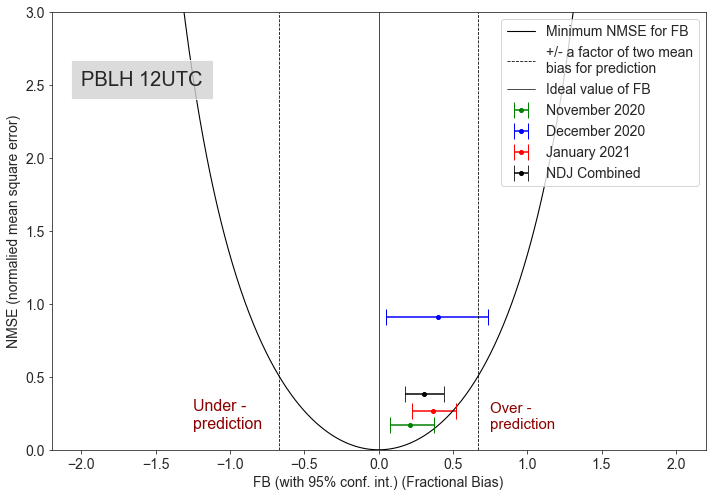

In [53]:
# # pblh12

# x_coords = np.linspace(-1.99999,1.99999,1000)
# y_coords = [(4 * x**2) / ((4 - x**2)) for x in x_coords]
# ylim = 3
# yval = [val for val in range(0,ylim+1)]

# fig, ax = plt.subplots(figsize=(10, 7))

# ax.plot(x_coords, y_coords, color='k', linewidth=1.1, label = 'Minimum NMSE for FB')
# ax.plot(np.ones(ylim+1)*(-2/3), yval, color='k', linestyle = '--', linewidth=0.8, label = '+/- a factor of two mean\n' + 'bias for prediction')
# ax.plot(np.ones(ylim+1)*(2/3), yval, color='k', linestyle = '--', linewidth=0.8)
# ax.plot(np.zeros(ylim+1),yval,color='k', linestyle = '-', linewidth=0.7, label='Ideal value of FB')

# # November
# # plt.errorbar(median, y, xerr=np.array([[lower_quartile ,upper_quartile]]).T, 
# #         fmt='ko')

# (_, caps, _) = plt.errorbar(0.2091, 0.1707, xerr = error_pblh12_nov,
#                             alpha=1.0, fmt='go', markersize=4,
#                             capsize=8, label='November 2020')

# (_, caps, _) = plt.errorbar(0.3985, 0.9075, xerr = error_pblh12_dec,
#                             alpha=1.0, fmt='bo', markersize=4,
#                             capsize=8, label='December 2020')

# (_, caps, _) = plt.errorbar(0.3642, 0.2642, xerr = error_pblh12_jan,
#                             alpha=1.0, fmt='ro', markersize=4,
#                             capsize=8, label='January 2021')

# (_, caps, _) = plt.errorbar(0.3049, 0.3811, xerr = error_pblh12,
#                             alpha=1.0, fmt='ko', markersize=4,
#                             capsize=8, label='NDJ Combined')

# for cap in caps:
#     cap.set_markeredgewidth(0.8)

# #text
# ax.text(-2.0, 2.5, 'PBLH 12UTC', style='normal', fontsize=20, bbox={'facecolor': 'lightgray', 'alpha': 0.8, 'pad': 10})

# ax.text(-1.25, 0.15, 'Under -\n' + 'prediction', fontsize=16,  color='darkred')
# ax.text(0.75, 0.15, 'Over -\n' + 'prediction', fontsize=15,  color='darkred')

# ax.set_ylim(0,ylim)
# # ax.set_xlim(-1,1)
# ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
# ax.tick_params(axis = 'both', which = 'minor', labelsize = 14)
# plt.legend()
# plt.legend(loc=1, prop={'size': 14})
# plt.xlabel("FB (with 95% conf. int.) (Fractional Bias)", fontsize = 14)
# plt.ylabel("NMSE (normalied mean square error)", fontsize = 14)
# fig.tight_layout()
# plt.savefig('./images/extra/bstrap_pblh12.pdf', dpi=300)